# Predict the employee attrition rate in organizations

## Problem statement
Employees are the most important part of an organization. Successful employees meet deadlines, make sales, and build the brand through positive customer interactions.

Employee attrition is a major cost to an organization and predicting such attritions is the most important requirement of the Human Resources department in many organizations. In this problem, your task is to predict the attrition rate of employees of an organization. 

## Variable Description
|Column Name|	Description|
|-----|---|
|Employee_ID|	Unique ID of each employee|
|Age|	Age of each employee|
|Unit|	Department under which the employee work|
|Education|	Rating of Qualification of an employee (1-5)|
|Gender|	Male-0 or Female-1|
|Decision_skill_possess|	Decision skill that an employee possesses|
|Post_Level|	Level of the post in an organization (1-5)|
|Relationship_Status|	Categorical Married or Single |
|Pay_Scale|	Rate in between 1 to 10|
|Time_of_service|	Years in the organization|
|growth_rate|	Growth rate in percentage of an employee|
|Time_since_promotion|	Time in years since the last promotion|
|Work_Life_balance|	Rating for work-life balance given by an employee.|
|Travel_Rate|	Rating based on travel history(1-3)|
|Hometown|	Name of the city|
|Compensation_and_Benefits|	Categorical Variabe|
|VAR1 - VAR7|	Anominised variables|
|Attrition_rate(TARGET VARIABLE)|	Attrition rate of each employee|

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('Train.csv')
train_df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [3]:
test_df = pd.read_csv('Test.csv')
test_df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [4]:
# train_df.shape
test_df.shape

(3000, 23)

## Exploring Data

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
Employee_ID                  7000 non-null object
Gender                       7000 non-null object
Age                          6588 non-null float64
Education_Level              7000 non-null int64
Relationship_Status          7000 non-null object
Hometown                     7000 non-null object
Unit                         7000 non-null object
Decision_skill_possess       7000 non-null object
Time_of_service              6856 non-null float64
Time_since_promotion         7000 non-null int64
growth_rate                  7000 non-null int64
Travel_Rate                  7000 non-null int64
Post_Level                   7000 non-null int64
Pay_Scale                    6991 non-null float64
Compensation_and_Benefits    7000 non-null object
Work_Life_balance            6989 non-null float64
VAR1                         7000 non-null int64
VAR2                         6423 non-null fl

In [6]:
train_df.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [7]:
train_df.isnull().any()

Employee_ID                  False
Gender                       False
Age                           True
Education_Level              False
Relationship_Status          False
Hometown                     False
Unit                         False
Decision_skill_possess       False
Time_of_service               True
Time_since_promotion         False
growth_rate                  False
Travel_Rate                  False
Post_Level                   False
Pay_Scale                     True
Compensation_and_Benefits    False
Work_Life_balance             True
VAR1                         False
VAR2                          True
VAR3                         False
VAR4                          True
VAR5                         False
VAR6                         False
VAR7                         False
Attrition_rate               False
dtype: bool

In [8]:
train_df['Age'].isnull().value_counts()

False    6588
True      412
Name: Age, dtype: int64

In [9]:
miss = train_df.isnull().sum()/len(train_df)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Pay_Scale            0.001286
Work_Life_balance    0.001571
Time_of_service      0.020571
Age                  0.058857
VAR2                 0.082429
VAR4                 0.093714
dtype: float64

In [10]:
#visualising missing values
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Name']
miss['Name'] = miss.index

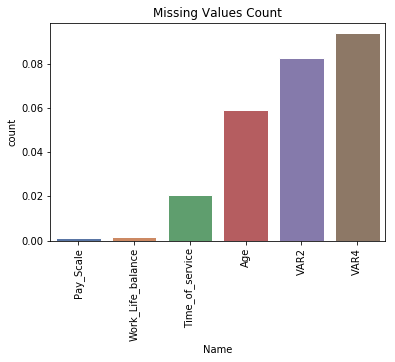

In [11]:
#plot the missing value count
plt.title('Missing Values Count')
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Name', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.show()

In [12]:
# separate variables into new data frames
numeric_data = train_df.select_dtypes(include=[np.number])
cat_data = train_df.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 17 numeric and 7 categorical columns in train data


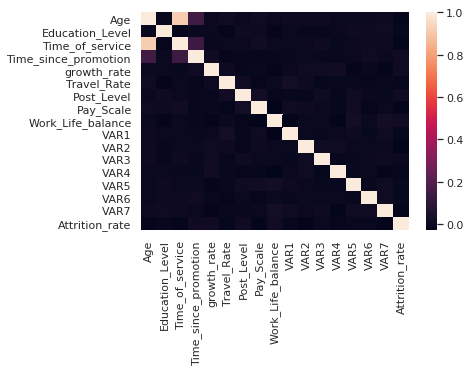

In [13]:
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr)

In [14]:
objlist = train_df.select_dtypes(include='object').columns
objlist

Index(['Employee_ID', 'Gender', 'Relationship_Status', 'Hometown', 'Unit',
       'Decision_skill_possess', 'Compensation_and_Benefits'],
      dtype='object')

In [15]:
num_list = train_df.select_dtypes(include=[np.number]).columns
num_list

Index(['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion',
       'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [16]:
train_df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


## Concatenating train and test csv files

In [17]:
attrition = train_df.Attrition_rate
alldata = pd.concat([train_df.drop(['Attrition_rate'], axis=1), test_df])

print(train_df.shape, test_df.shape, alldata.shape)

(7000, 24) (3000, 23) (10000, 23)


## Data Cleaning

In [18]:
alldata.apply(lambda x: sum(x.isnull()))

Employee_ID                    0
Gender                         0
Age                          573
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              196
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                     12
Compensation_and_Benefits      0
Work_Life_balance             16
VAR1                           0
VAR2                         794
VAR3                           0
VAR4                         954
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [19]:
alldata['VAR4'].isnull().value_counts()

False    9046
True      954
Name: VAR4, dtype: int64

In [20]:
alldata[alldata.values == 'EID_17492']

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3


In [21]:
# Impute missing numerical variables
alldata['Age'] = alldata.Age.fillna(alldata.Age.median())
alldata['Time_of_service'] = alldata.Time_of_service.fillna(alldata.Time_of_service.median())
alldata['Pay_Scale'] = alldata.Pay_Scale.fillna(alldata.Pay_Scale.median())
alldata['Work_Life_balance'] = alldata.Work_Life_balance.fillna(alldata.Work_Life_balance.median())
alldata['VAR2'] = alldata.VAR2.fillna(alldata.VAR2.median())
alldata['VAR4'] = alldata.VAR4.fillna(alldata.VAR4.median())


alldata.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,8.0,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2


### Notes: 
In pandas isnull() return both null and as a boolean variable. So it's confusing.
Null values represents "no value" or "nothing", it's not even an empty string or zero. It can be used to represent that nothing useful exists. NaN stands for "Not a Number", it's usually the result of a mathematical operation that doesn't make sense, e.g. 0.0/0.0

In [22]:
alldata.apply(lambda x: sum(x.isnull()))

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

### Notes: Filling null values but it doesn't work for NAN values.

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

alldata['Employee_ID']=pd.DataFrame(le.fit_transform(alldata.Employee_ID))
alldata['Gender']=pd.DataFrame(le.fit_transform(alldata.Gender))
alldata['Relationship_Status']=pd.DataFrame(le.fit_transform(alldata.Relationship_Status))
alldata['Hometown']=pd.DataFrame(le.fit_transform(alldata.Hometown))
alldata['Unit']=pd.DataFrame(le.fit_transform(alldata.Unit))
alldata['Decision_skill_possess']=pd.DataFrame(le.fit_transform(alldata.Decision_skill_possess))
alldata['Compensation_and_Benefits']=pd.DataFrame(le.fit_transform(alldata.Compensation_and_Benefits))
alldata.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,5961,0,42.0,4,0,1,2,2,4.0,4,...,7.0,2,3.0,4,0.7516,1.8688,2.0,4,5,3
1,3567,1,24.0,3,1,3,3,0,5.0,4,...,6.0,2,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,7601,0,58.0,3,0,0,8,2,27.0,3,...,8.0,2,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,3328,0,26.0,3,1,2,1,1,4.0,3,...,8.0,2,1.0,3,-1.8176,-0.4537,2.0,3,7,3
4,5559,0,31.0,1,0,3,3,2,5.0,4,...,2.0,3,3.0,1,0.7516,-0.4537,2.0,2,8,2


### Splitting data into new training and testing.

In [25]:
alldata.shape

(10000, 23)

In [26]:
#Divide into test and train:
data_train = alldata.iloc[:3000]
data_test = alldata.iloc[3000:]
print(data_train.shape,data_test.shape)
# train = alldata.loc[alldata['source']=="train"]
# test = alldata.loc[alldata['source']=="test"]

# #Drop unnecessary columns:
# test.drop(['Attrition_rate','source'],axis=1,inplace=True)
# train.drop(['source'],axis=1,inplace=True)

(7000, 23) (3000, 23)


In [46]:
X = data_train.values
test = data_test.values
y = attrition.values
# print(train.shape,test.shape)
y.shape

(7000,)

## Model Evaluation

In [32]:
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2,
                       gamma=0.0,
                       learning_rate=0.01,
                       max_depth=6,
                       min_child_weight=1.5,
                       n_estimators=7200,
                       reg_alpha=0.9,
                       reg_lambda=0.6,
                       subsample=0.2,
                       seed=42)

regr.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.2, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=6,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=7200, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.9,
             reg_lambda=0.6, scale_pos_weight=1, seed=42, subsample=0.2,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
from sklearn.linear_model import Lasso

#found this best alpha through cross-validation
best_alpha = 0.00099

lass = Lasso(alpha=best_alpha, max_iter=50000)
lass.fit(X,y)

Lasso(alpha=0.00099, copy_X=True, fit_intercept=True, max_iter=50000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators = 100, random_state = 0) 

rf.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

### Model ensembling

In [58]:
y_pred_xgb = regr.predict(test)
y_pred_lass = lass.predict(test)
y_pred_rf = rf.predict(test)

y_pred = (y_pred_rf + y_pred_lass) / 2
# y_pred = np.exp(y_pred)
test_df['Attrition_rate'] = y_pred
test_df[['Employee_ID', 'Attrition_rate']].to_csv('Submission_rl.csv', index=False)

### Checking for Error rate in training phase.

In [ ]:

# from sklearn.metrics import mean_squared_error
# def rmse(y_test,y_pred):
#       return np.sqrt(mean_squared_error(y_test,y_pred))

# run prediction on training set to get an idea of how well it does
# y_test = y
# print("XGBoost Training error score: ", rmse(y_test, y_pred_xgb))

# print(y_pred_xgb.shape,y.shape)
# y_pred_xgb = regr.predict(test)
# print("XGBoost Testing error score: ", rmse(y_test, y_pred_xgb))

In [242]:
# def graphs(y_pred):
#     #to see the relationship between the predicted values using scattered graph  
#     plt.scatter(y_test,y_pred)
#     plt.plot([0,(np.max(y_test))],[0,(np.max(y_test))], 'r', alpha=0.5)
#     plt.xlabel('Observed')
#     plt.ylabel('Predicted')

XG Boost Regressor


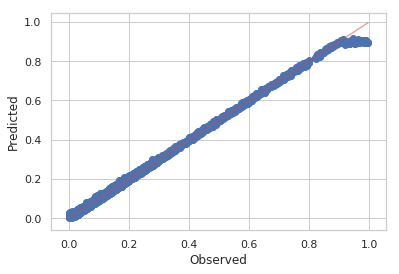

In [249]:
# print("XG Boost Regressor")
# graphs(y_pred_xgb)

In [221]:
# label_df = pd.DataFrame(index = train.index, columns = ['Attrition_rate'])
# label_df = train_df['Attrition_rate']
# label_df.head()

0    0.1841
1    0.0670
2    0.0851
3    0.0668
4    0.1827
Name: Attrition_rate, dtype: float64

Lasso Regressor


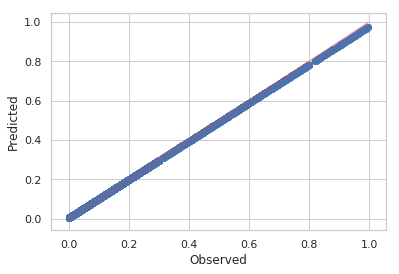

In [250]:
# print("Lasso Regressor")

# graphs(y_pred_lass)